# Question 3

Inputs and Set up

In [6]:
import json
from IPython.display import Image, display

In [7]:
s31 = {'A':[('B',2)],'B':[('A',2),('C',5)],'C':[('B',5)]}
s32 = {'A':[('E',5),('H',6),('F',1),('B',8)],'B':[('F',6),('C',4)],'C':[('F',2),('G',7)],'G':[('F',9)],'F':[('H',5)],'H':[('E',3)]}

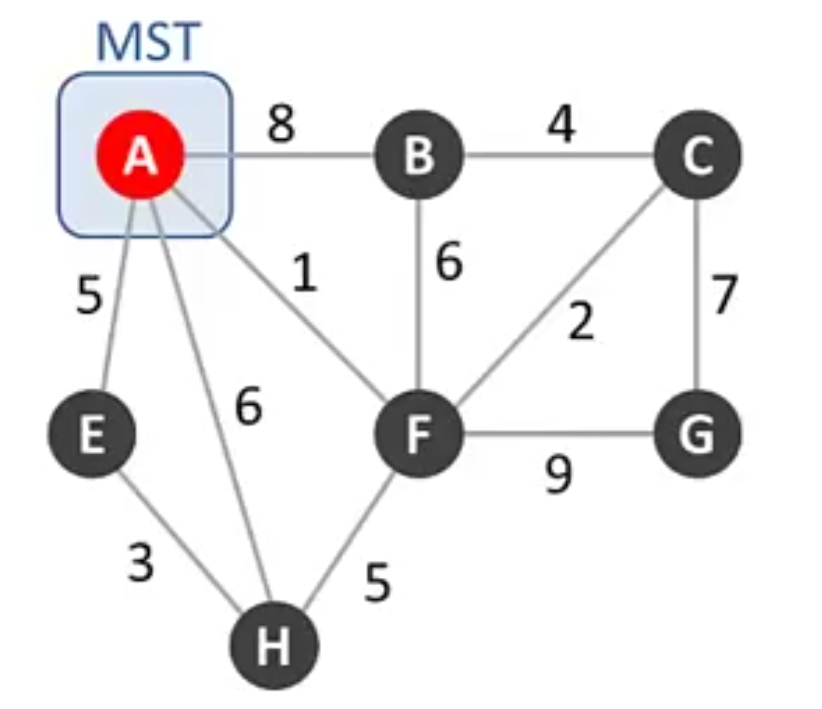

In [8]:
display(Image(filename='/home/jobin/summer2016/ml-nanodegree/projects/interview/3img.png'))

In [9]:
a = s32
vTable =[]; wTable =[]
lenn = 0

class Ddd(dict):
    def __setitem__(self, key, value):
        try:
            self[key]
        except KeyError:
            super(Dictlist, self).__setitem__(key, [])
        self[key].append(value)

for k in s32:
    lenn = len(a[k])
    for j in range(len(a[k])):
        if sorted([k,a[k][j][0]]) not in vTable:
            if a[k][j][1] not in wTable:
                vTable.append([sorted([k,a[k][j][0]])])
                wTable.append(a[k][j][1])
                vwDict = Ddd(zip(wTable,vTable))
            else:
                vwDict[a[k][j][1]] = sorted([k,a[k][j][0]])
jsonDict = json.dumps(vwDict,sort_keys=True)
v = []
for k in s32:
    for j in range(len(a[k])):
        if k not in v:
            v.append(k)
        if a[k][j][0] not in v:
            v.append(a[k][j][0])


jsonObject = json.loads(jsonDict)
print jsonObject

{u'1': [[u'A', u'F']], u'3': [[u'E', u'H']], u'2': [[u'C', u'F']], u'5': [[u'A', u'E'], [u'F', u'H']], u'4': [[u'B', u'C']], u'7': [[u'C', u'G']], u'6': [[u'A', u'H'], [u'B', u'F']], u'9': [[u'F', u'G']], u'8': [[u'A', u'B']]}


#### Prims Algorithm

1. Reaches every vertex
2. Has minimum total weight
3. Has no cycles

### Psuedocode
> 
>choose vertex 
>
>list the sorted edges from that vertex 
>
>     if jsonObject[edge] not in vertexArray 
>
>select lowest edge from that vertex
>
>append the new vertex to chosen verticeArray
>
>choose lowest edge connected to a vertex from verticeArray
    >
    >     append to verticeArray, if new vertex chosen from edge is not in verticeArray
    




In [33]:
def chooser(chosenV, array_Vertexes, jsonObject,printer):
    if chosenV in array_Vertexes: array_Vertexes.remove(chosenV)
    chosenVOptions = []
    for Key in sorted(jsonObject.keys()):
        for Val in range(len(jsonObject[Key])):
            if str(chosenV)==str(jsonObject[Key][Val][0]) or str(chosenV)==str(jsonObject[Key][Val][1]):
                #for while, chosenV is in jsonObject[Key][Val] but also vertexArray 
                if str(jsonObject[Key][Val][0]) not in array_Vertexes and str(jsonObject[Key][Val][0]) not in array_Vertexes:
                    chosenVOptions.append([str(Key), str(jsonObject[Key][Val][0]),str(jsonObject[Key][Val][1])])
    chosenVertex = min(chosenVOptions)
    return chosenVertex

In [34]:
def prims():
    vertexArray = []
    print v
    for chosenV in v:
        if chosenV in vertexArray:
            continue

        chosenVertex = chooser(chosenV,vertexArray,jsonObject,False)
        vertexArray.append(chosenV)
        vertexArray.append(chosenVertex[2] if chosenV!=chosenVertex[2] else chosenVertex[1])

        print '\nchosenV = ', chosenV,  ', vertex array = ' ,vertexArray

        len_vertexArray = 0
        while(len(vertexArray)!=len_vertexArray):
            len_vertexArray = len(vertexArray)
            expandVertex = []
            for vertex in vertexArray:
                print 'vertex = ',vertex
                print 'chooser = ', chooser(vertex,vertexArray,jsonObject,True)
                expandVertex.append(chooser(vertex,vertexArray,jsonObject,True))
            print 'before min expandVertex = ', expandVertex
            print 'min expandVertex = ', min(expandVertex)
            expandVertex = min(expandVertex)
            vertexArray.append(expandVertex[2] if vertex != expandVertex[2] else expandVertex[1])


In [35]:
if __name__ == "__main__":
    prims()

['A', 'E', 'H', 'F', 'B', 'C', 'G']

chosenV =  A , vertex array =  ['A', 'F']
vertex =  A
chooser =  ['1', 'A', 'F']
before min expandVertex =  [['1', 'A', 'F']]
min expandVertex =  ['1', 'A', 'F']

chosenV =  E , vertex array =  ['F', 'F', 'E', 'H']
vertex =  F
chooser =  ['1', 'A', 'F']
vertex =  H
chooser =  ['5', 'F', 'H']
before min expandVertex =  [['1', 'A', 'F'], ['5', 'F', 'H']]
min expandVertex =  ['1', 'A', 'F']
vertex =  E
chooser =  ['3', 'E', 'H']
before min expandVertex =  [['3', 'E', 'H']]
min expandVertex =  ['3', 'E', 'H']

chosenV =  B , vertex array =  ['F', 'H', 'B', 'C']
vertex =  F
chooser =  ['1', 'A', 'F']
vertex =  B
chooser =  ['4', 'B', 'C']
before min expandVertex =  [['1', 'A', 'F'], ['4', 'B', 'C']]
min expandVertex =  ['1', 'A', 'F']
vertex =  H
chooser =  ['3', 'E', 'H']
vertex =  F
chooser =  ['1', 'A', 'F']
before min expandVertex =  [['3', 'E', 'H'], ['1', 'A', 'F']]
min expandVertex =  ['1', 'A', 'F']
vertex =  C
chooser =  ['2', 'C', 'F']
before m

ValueError: min() arg is an empty sequence